# **K-Means (K-Ortalamalar)**

- Amaç, **gözlemleri birbirlerine olan benzerliklerine göre kümelemere ayırmaktır.** 
- Yani oluşturulacak olan **kümelerin kendi için de birbirlerine çok benzer(homojen)**, **kümeler arasında ise birbirlerine benzemeyen(heterojen)** yapısı olması gerekir.
- **Küme içi benzerlik maximum olmalıdır.** 
- **Kümeler arası benzerlik de minimum olmalıdır.**
- K-Means, bir **kümeleme yöntemi**dir.
- Kümeleme yöntemlerinin amacı, **benzerlik matrislerini kullanarak gözlemleri ya da değişkenleri kümelemeye çalışmaktır.**
- Oluşturulmaya çalışılan kümelerin **kendi içinde homojen, birbirlerine göre heterojen** olması beklenir.
- K-Means yöntemi sadece belirli sayıda kümeye ayrılır.

#### **K-Means Yöntemi Uygulama Adımları;**

**Adım 1**: Küme sayısı belirlenir. 

**Adım 2**: Rastgele k adet merkez(küme) seçilir.

**Adım 3**: Her gözlem için k adet merkezlere uzaklıklar hesaplanır.

**Adım 4**: Her gözlem en yakın olduğu merkeze yani kümeye atanır.

**Adım 5**: Atama işlemleriinden sonra oluşan kümeler için tekrar merkez hesaplamaları yapılır.

**Adım 6**: Bu işlem belirlenen bir iterasyon adedince tekrar edilir ve küme içi hata kareler toplamlarının toplamının (total within-cluster variation) minimum olduğu durumdaki gözlemlerin kümeleme yapısı nihai kümelenme olarak seçilir.

# Gerekli Kütüphaneler

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Uyarı Mesajları ile Karşılaşmamak için bu kütüphaneyi kullanıyoruz.
from warnings import filterwarnings
filterwarnings("ignore", category= DeprecationWarning)
filterwarnings("ignore", category= FutureWarning)



# Veri Seti

In [7]:
df = pd.read_csv("./USArrests.csv", index_col= 0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [8]:
# eksik gözlem kontrol edildi.
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 4.5+ KB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


array([[<AxesSubplot:title={'center':'Murder'}>,
        <AxesSubplot:title={'center':'Assault'}>],
       [<AxesSubplot:title={'center':'UrbanPop'}>,
        <AxesSubplot:title={'center':'Rape'}>]], dtype=object)

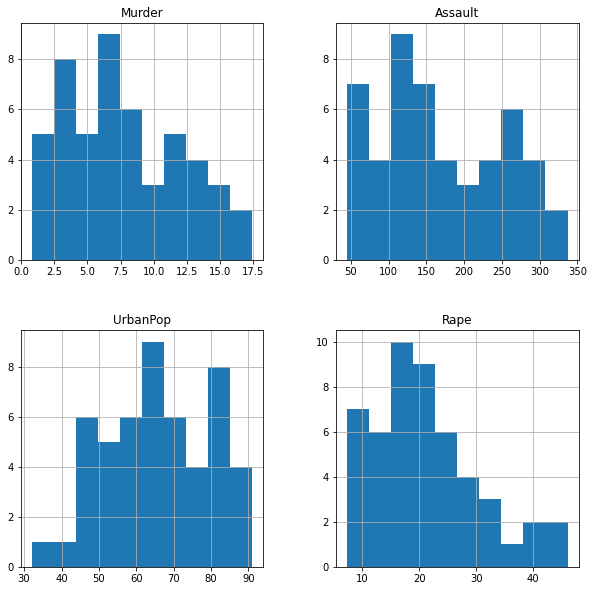

In [12]:
# Grafik Histogramı oluşturuldu.
df.hist(figsize=(10,10))

In [13]:
kmeans = KMeans(n_clusters=4)

In [16]:
kmeans_model = kmeans.fit(df)

In [22]:
# Küme sayısı
kmeans_model.n_clusters

4

In [23]:
# Belirlenmiş olan 4 adet kümenin merkezleri
kmeans_model.cluster_centers_

array([[ 11.8125    , 272.5625    ,  68.3125    ,  28.375     ],
       [  2.95      ,  62.7       ,  53.9       ,  11.51      ],
       [  8.21428571, 173.28571429,  70.64285714,  22.84285714],
       [  5.59      , 112.4       ,  65.6       ,  17.27      ]])

In [25]:
# Gözlemlerin Sınıf Etiketleri
kmeans_model.labels_

array([0, 0, 0, 2, 0, 2, 3, 0, 0, 2, 1, 3, 0, 3, 1, 3, 3, 0, 1, 0, 2, 0,
       1, 0, 2, 3, 3, 0, 1, 2, 0, 0, 0, 1, 3, 2, 2, 3, 2, 0, 1, 2, 2, 3,
       1, 2, 2, 1, 1, 2])

# Kümelerin Görselleştirilmesi

In [99]:
# kümeleri 2 adet olarak belirledik. Normalde verisetinde 4 adet küme var.
k_means = KMeans(n_clusters=2).fit(df)

In [100]:
kumeler = k_means.labels_

In [101]:
kumeler

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

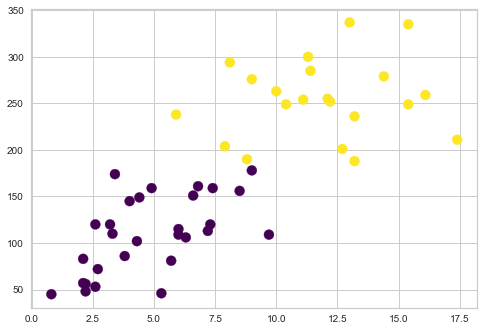

In [113]:
# Birinci sutündaki değişken ile ikinci sutündaki değişkenleri kullanarak kümelenmiş halini gösterdik.
plt.scatter(df.iloc[:,0], df.iloc[:,1], c= kumeler, s= 100, cmap="viridis");

In [103]:
merkezler = k_means.cluster_centers_

In [104]:
merkezler

array([[  4.84137931, 109.75862069,  64.03448276,  16.24827586,
          1.72413793],
       [ 11.85714286, 255.        ,  67.61904762,  28.11428571,
          0.76190476]])

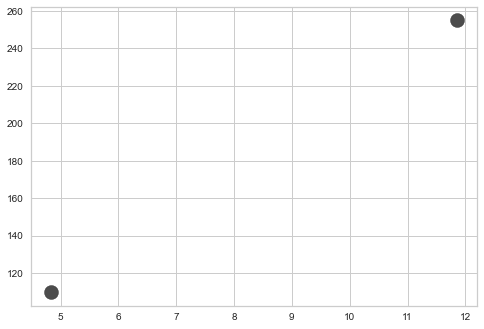

In [105]:
# Merkezdeki kümelerin uzaklıklarını gösteren bir grafik elde ettik.
plt.scatter(merkezler[:,0], merkezler[:,1], c = "black", s=200, alpha=0.7);

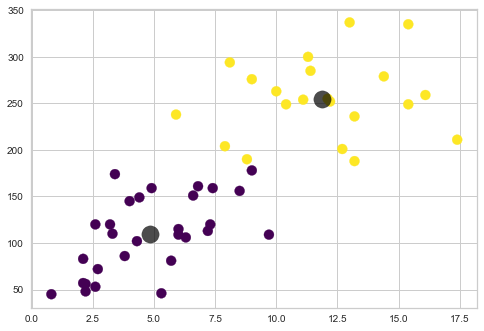

In [112]:
# Kümelerin merkezlerini iki küme arasındaki merkezlerinin durumu gösterdik.
plt.scatter(df.iloc[:,0], df.iloc[:,1], c= kumeler, s= 100, cmap="viridis");
plt.scatter(merkezler[:,0], merkezler[:,1], c = "black", s=300, alpha=0.7);

# Optimum Küme Sayısının Belirlenmesi

**Elbow Yöntemi**
- Elbow yöntemi; noktaların her K değerine göre küme merkezine uzaklıklarının karesi toplamı hesaplanmaktadır. Bu değerlere göre her K değeri için grafik çizilmektedir. Grafik üzerinde toplamlar arasındaki farkın azalmaya başladığı dirsek noktası en uygun K değeri olarak belirlenmektedir

In [107]:
df

,Murder,Assault,UrbanPop,Rape,Kume_No
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,0
California,9.0,276,91,40.6,1
Colorado,7.9,204,78,38.7,0
Connecticut,3.3,110,77,11.1,3
Delaware,5.9,238,72,15.8,1
Florida,15.4,335,80,31.9,1
Georgia,17.4,211,60,25.8,0


In [70]:
# SSD = Uzaklık Farklarının Karelerinin Toplamı
ssd = []

K = range(1,30)

for k in K:
    kmeans = KMeans(n_clusters = k).fit(df)
    ssd.append(kmeans.inertia_)

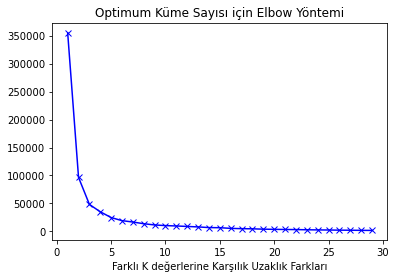

In [79]:
plt.plot(K, ssd, "bx-")
plt.xlabel("Farklı K değerlerine Karşılık Uzaklık Farkları")
plt.title("Optimum Küme Sayısı için Elbow Yöntemi");

In [80]:
# yellowbrick modeli kullanarak ise yukarıda kendi yaptığımız grafiği daha optimizee bir şekilde karşımıza çıkartması için kullanıyoruz.
!pip install yellowbrick

In [81]:
from yellowbrick.cluster import KElbowVisualizer

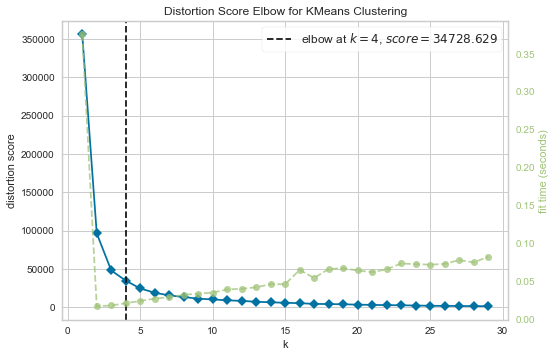

In [84]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k=(1,30))
visu.fit(df)
visu.poof();

- yellowbrick alogritmasını kullanarak yukarıdaki kendi yaptığımız grafik tablodan manuel olarak çıkardığımız sonucu daha detaylı bir şekilde önerisini göstererek verdi. 
- Yani burda k değeri için önerisini bulundurup yukarıdaki kendi yaptıgımız grafikte k değerini kendimiz bulmamız gerekiyorken aynı k değerini bize bir öneri içerisinde verdi. k (küme) değeri 4 tür. 
- Yani elimizdeki veri setini 4 kümeye ayırırsak en optimum küme sayısın belirleemiş oluruz. 

**Final K-Means**

In [86]:
kmeans = KMeans(n_clusters=4).fit(df)
kmeans

KMeans(n_clusters=4)

In [87]:
kumeler = kmeans.labels_

In [91]:
pd.DataFrame({"Eyaletler": df.index, "Kumeeler": kumeler})

,Eyaletler,Kumeeler
0,Alabama,1
1,Alaska,1
2,Arizona,1
3,Arkansas,0
4,California,1
5,Colorado,0
6,Connecticut,3
7,Delaware,1
8,Florida,1
9,Georgia,0


In [92]:
df["Kume_No"] = kumeler

In [90]:
df

,Murder,Assault,UrbanPop,Rape,Kume_No
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,0
California,9.0,276,91,40.6,1
Colorado,7.9,204,78,38.7,0
Connecticut,3.3,110,77,11.1,3
Delaware,5.9,238,72,15.8,1
Florida,15.4,335,80,31.9,1
Georgia,17.4,211,60,25.8,0
